In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.shape

(8807, 12)

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   str  
 1   type          8807 non-null   str  
 2   title         8807 non-null   str  
 3   director      6173 non-null   str  
 4   cast          7982 non-null   str  
 5   country       7976 non-null   str  
 6   date_added    8797 non-null   str  
 7   release_year  8807 non-null   int64
 8   rating        8803 non-null   str  
 9   duration      8804 non-null   str  
 10  listed_in     8807 non-null   str  
 11  description   8807 non-null   str  
dtypes: int64(1), str(11)
memory usage: 825.8 KB


In [4]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

df[['title','type','country','date_added','year_added','month_added']].head()


,title,type,country,date_added,year_added,month_added
0,Dick Johnson Is Dead,Movie,United States,2021-09-25,2021.0,September
1,Blood & Water,TV Show,South Africa,2021-09-24,2021.0,September
2,Ganglands,TV Show,NaN,2021-09-24,2021.0,September
3,Jailbirds New Orleans,TV Show,NaN,2021-09-24,2021.0,September
4,Kota Factory,TV Show,India,2021-09-24,2021.0,September


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   str           
 1   type          8807 non-null   str           
 2   title         8807 non-null   str           
 3   director      6173 non-null   str           
 4   cast          7982 non-null   str           
 5   country       7976 non-null   str           
 6   date_added    8709 non-null   datetime64[us]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   str           
 9   duration      8804 non-null   str           
 10  listed_in     8807 non-null   str           
 11  description   8807 non-null   str           
 12  year_added    8709 non-null   float64       
 13  month_added   8709 non-null   str           
dtypes: datetime64[us](1), float64(1), int64(1), str(11)
memory usage: 963.4 KB


In [6]:
df.isna().sum().sort_values(ascending=False)


director        2634
country          831
cast             825
year_added        98
month_added       98
date_added        98
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
description        0
listed_in          0
dtype: int64

In [7]:
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')

df[['country','director','cast','rating']].isna().sum()


country     0
director    0
cast        0
rating      0
dtype: int64

In [8]:
# Split duration into numeric + unit
df['duration_num'] = df['duration'].str.extract('(\d+)').astype('float')
df['duration_unit'] = df['duration'].str.extract('([A-Za-z]+)')

df[['type','title','duration','duration_num','duration_unit']].head(10)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\TP3402VAO\AppData\Local\Temp\ipykernel_21412\2136439561.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype('float')


,type,title,duration,duration_num,duration_unit
0,Movie,Dick Johnson Is Dead,90 min,90.0,min
1,TV Show,Blood & Water,2 Seasons,2.0,Seasons
2,TV Show,Ganglands,1 Season,1.0,Season
3,TV Show,Jailbirds New Orleans,1 Season,1.0,Season
4,TV Show,Kota Factory,2 Seasons,2.0,Seasons
5,TV Show,Midnight Mass,1 Season,1.0,Season
6,Movie,My Little Pony: A New Generation,91 min,91.0,min
7,Movie,Sankofa,125 min,125.0,min
8,TV Show,The Great British Baking Show,9 Seasons,9.0,Seasons
9,Movie,The Starling,104 min,104.0,min


In [9]:
# Movie duration in minutes
df['movie_minutes'] = np.where(df['type'] == 'Movie', df['duration_num'], np.nan)

# TV show seasons
df['tv_seasons'] = np.where(df['type'] == 'TV Show', df['duration_num'], np.nan)

df[['type','duration','movie_minutes','tv_seasons']].head(10)


,type,duration,movie_minutes,tv_seasons
0,Movie,90 min,90.0,NaN
1,TV Show,2 Seasons,NaN,2.0
2,TV Show,1 Season,NaN,1.0
3,TV Show,1 Season,NaN,1.0
4,TV Show,2 Seasons,NaN,2.0
5,TV Show,1 Season,NaN,1.0
6,Movie,91 min,91.0,NaN
7,Movie,125 min,125.0,NaN
8,TV Show,9 Seasons,NaN,9.0
9,Movie,104 min,104.0,NaN


In [10]:
df['duration'].isna().sum()


np.int64(3)

In [11]:
df = df.dropna(subset=['duration'])
df['duration'].isna().sum()

np.int64(0)

In [12]:
df['type'].value_counts()

type
Movie      6128
TV Show    2676
Name: count, dtype: int64

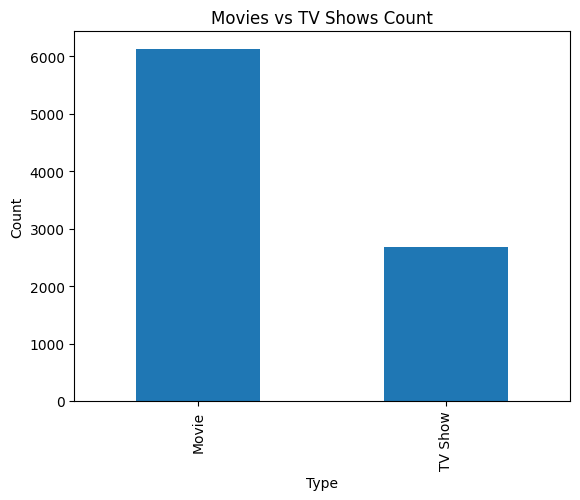

In [13]:
df['type'].value_counts().plot(kind='bar')
plt.title("Movies vs TV Shows Count")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()



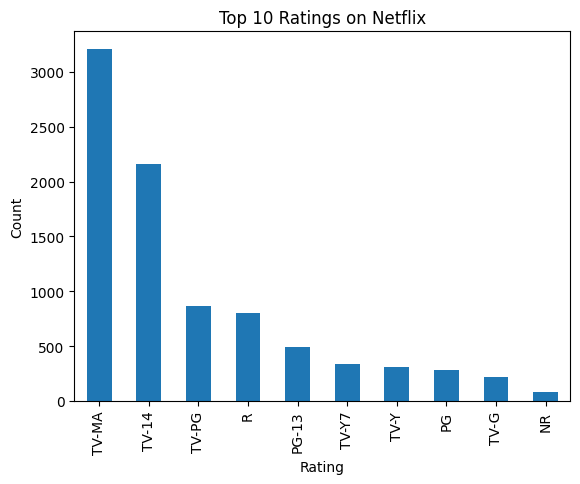

In [14]:
df['rating'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


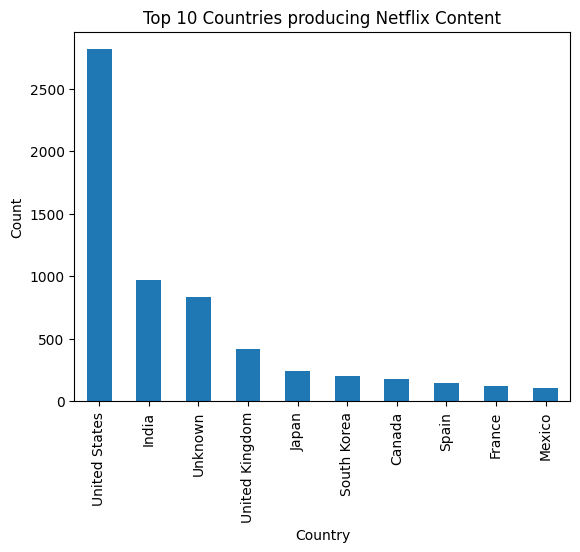

In [15]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


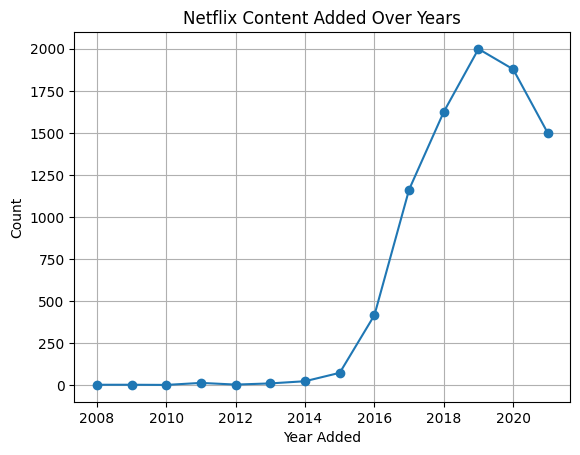

In [16]:
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Netflix Content Added Over Years")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.grid(True)
plt.show()


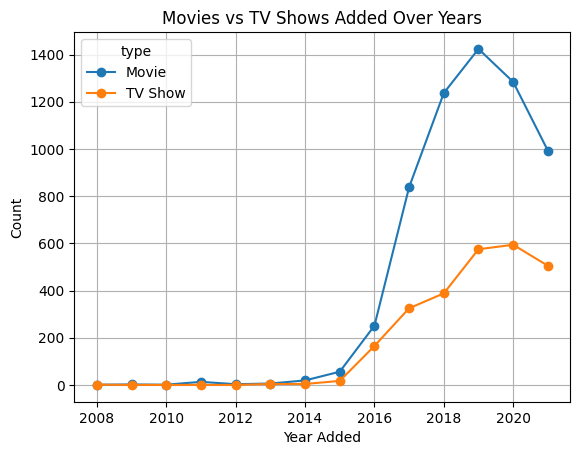

In [17]:
year_type = df.groupby(['year_added','type']).size().unstack().fillna(0)

year_type.plot(kind='line', marker='o')
plt.title("Movies vs TV Shows Added Over Years")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.grid(True)
plt.show()


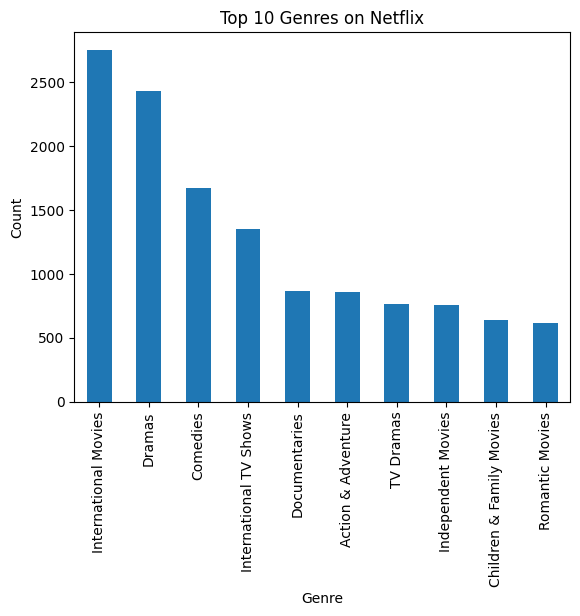

In [18]:
df['listed_in'] = df['listed_in'].str.split(', ')
genres = df.explode('listed_in')

genres['listed_in'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


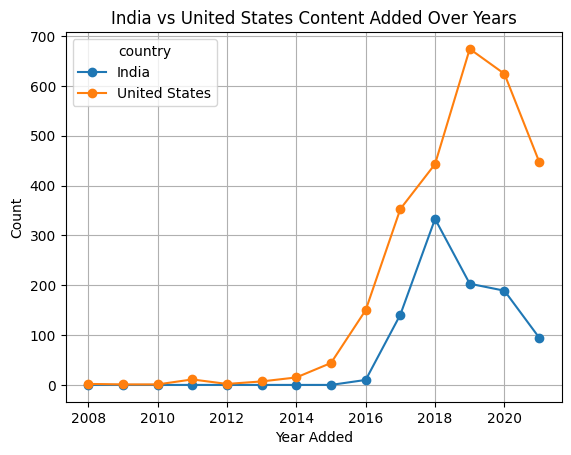

In [19]:
df_country = df[df['country'].isin(['India','United States'])]

df_country.groupby(['year_added','country']).size().unstack().fillna(0).plot(kind='line', marker='o')
plt.title("India vs United States Content Added Over Years")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.grid(True)
plt.show()
